In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [110]:
pd.set_option('max_rows',1200)

## Read Data

In [41]:
src_path = r'c:\Users\jaromir\OneDrive\UoM\100_Disertation\02_SrcData\03_TMP'

In [43]:
filenames = glob(src_path+'\*.pkl')
filenames        

['c:\\Users\\jaromir\\OneDrive\\UoM\\100_Disertation\\02_SrcData\\03_TMP\\clean_tweets_20200805.pkl',
 'c:\\Users\\jaromir\\OneDrive\\UoM\\100_Disertation\\02_SrcData\\03_TMP\\stock_prices_20200805.pkl']

In [44]:
tweets = pd.read_pickle(filenames[0])
stock_prices = pd.read_pickle(filenames[1])

In [45]:
tweets.head(3)

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,urls,ticker,sentiment_collection_date
0,DoejiStar,NaN,2019 Jan 2nd (22:30gmt) $JPY flash crash backd...,0.0,2.0,0.0,1.212522e+18,https://twitter.com/DoejiStar/status/121252203...,5.071085e+08,2020-01-01 23:52:35+00:00,2020-01-01 23:52:35+00:00,#Caixin,NaN,NaN,AAPL,2020-01-02
2,PigOfFed,MarcoMNYC,"Should've been $spx 4,000 i mean the fed balan...",0.0,1.0,0.0,1.212521e+18,https://twitter.com/PigOfFed/status/1212521491...,1.182741e+18,2020-01-01 23:50:25+00:00,2020-01-01 23:50:25+00:00,NaN,NaN,NaN,AAPL,2020-01-02
3,mikeharrisNY,NaN,Market driver 2019. $AAPL had highest approx. ...,1.0,12.0,0.0,1.212521e+18,https://twitter.com/mikeharrisNY/status/121252...,1.795716e+08,2020-01-01 23:46:23+00:00,2020-01-01 23:46:23+00:00,NaN,NaN,NaN,AAPL,2020-01-02


In [46]:
stock_prices.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2019-12-31,288.46,292.19,288.05,292.16,25201400,0.0,0,AAPL
2020-01-02,294.74,299.08,293.70,298.83,33870100,0.0,0,AAPL
2020-01-03,295.65,299.06,295.00,295.92,36580700,0.0,0,AAPL


## EDA Tweets

## Character length of the tweets

In [49]:
tweets['text_length'] = tweets.text.apply(len)

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,urls,ticker,sentiment_collection_date,text_length
0,DoejiStar,NaN,2019 Jan 2nd (22:30gmt) $JPY flash crash backd...,0.0,2.0,0.0,1.212522e+18,https://twitter.com/DoejiStar/status/121252203...,5.071085e+08,2020-01-01 23:52:35+00:00,2020-01-01 23:52:35+00:00,#Caixin,NaN,NaN,AAPL,2020-01-02,278
2,PigOfFed,MarcoMNYC,"Should've been $spx 4,000 i mean the fed balan...",0.0,1.0,0.0,1.212521e+18,https://twitter.com/PigOfFed/status/1212521491...,1.182741e+18,2020-01-01 23:50:25+00:00,2020-01-01 23:50:25+00:00,NaN,NaN,NaN,AAPL,2020-01-02,141
3,mikeharrisNY,NaN,Market driver 2019. $AAPL had highest approx. ...,1.0,12.0,0.0,1.212521e+18,https://twitter.com/mikeharrisNY/status/121252...,1.795716e+08,2020-01-01 23:46:23+00:00,2020-01-01 23:46:23+00:00,NaN,NaN,NaN,AAPL,2020-01-02,80
4,maythefroth,business,$AAPL He who is closest to the consumer wins.,0.0,0.0,0.0,1.212520e+18,https://twitter.com/maythefroth/status/1212519...,9.401496e+17,2020-01-01 23:43:29+00:00,2020-01-01 23:43:29+00:00,NaN,NaN,https://twitter.com/business/status/1212516202...,AAPL,2020-01-02,46
5,_steve2_,NaN,Come Sail Away http://With.me Tim @tim_cook $a...,0.0,1.0,0.0,1.212519e+18,https://twitter.com/_steve2_/status/1212519187...,3.193290e+09,2020-01-01 23:41:16+00:00,2020-01-01 23:41:16+00:00,NaN,@tim_cook,http://With.me,AAPL,2020-01-02,66


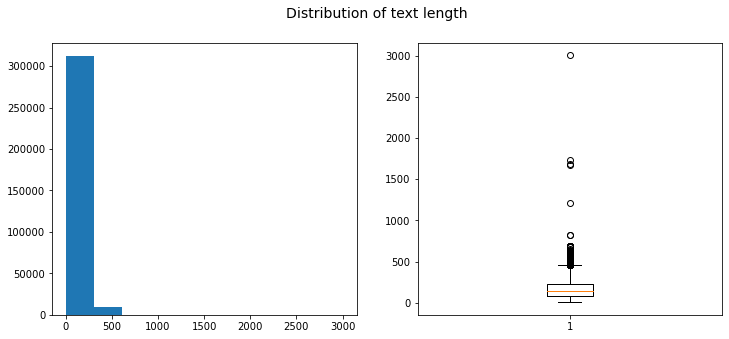

In [58]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(tweets['text_length'])
axes[1].boxplot(tweets['text_length'])
fig.suptitle('Distribution of text length', fontsize=14)
plt.show()

In [62]:
tweets[tweets['text_length'] > 500]

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,urls,ticker,sentiment_collection_date,text_length
1270,sssvenky,NaN,Inside Day Scan Results (Stocks > 10; Volume >...,0.0,6.0,1.0,1.213247e+18,https://twitter.com/sssvenky/status/1213247135...,1.500948e+08,2020-01-03 23:53:52+00:00,2020-01-03 23:53:52+00:00,NaN,@AOTtrades,https://www.finviz.com/screener.ashx?v=211&t=T...,AAPL,2020-01-06,1671
8629,rimisback,NaN,CES 2020: BlackBerry integrates Cylance with Q...,0.0,0.0,0.0,1.216682e+18,https://twitter.com/rimisback/status/121668245...,4.886650e+09,2020-01-13 11:24:36+00:00,2020-01-13 11:24:36+00:00,NaN,@BlackBerry @QNX_News @QNX_Auto @WSJ @business...,https://www.zdnet.com/article/ces-2020-blackbe...,AAPL,2020-01-13,521
13686,dmlevitt,NaN,Who #Apple eyes 639KSF at 11Penn hot on heels ...,0.0,2.0,0.0,1.220047e+18,https://twitter.com/dmlevitt/status/1220047266...,2.924508e+08,2020-01-22 18:15:10+00:00,2020-01-22 18:15:10+00:00,#Apple #Macys #NYC #CRE,@nypost @nypost,https://nypost.com/2020/01/21/apple-eyes-11-pe...,AAPL,2020-01-22,513
19369,petergo99037185,NaN,$AAPL Interactive Chart: https://finance.yahoo...,0.0,0.0,0.0,1.222573e+18,https://twitter.com/petergo99037185/status/122...,7.608838e+08,2020-01-29 17:30:57+00:00,2020-01-29 17:30:57+00:00,NaN,@YahooFinance,https://finance.yahoo.com/chart/AAPL#eyJpbnRlc...,AAPL,2020-01-29,3004
19738,sonycomeback,NaN,$SNE #SONY $250 Here we go again Dan Loeb (AKA...,0.0,1.0,0.0,1.223016e+18,https://twitter.com/sonycomeback/status/122301...,7.349036e+17,2020-01-30 22:53:53+00:00,2020-01-30 22:53:53+00:00,#SONY #SONY #NIKKEI #Tokyo2020,NaN,https://www-irishtimes-com.cdn.ampproject.org/...,AAPL,2020-01-31,685
21132,TityoSatya,NaN,1.31.2020 FRI Month Week Year http://marketwat...,0.0,0.0,0.0,1.223486e+18,https://twitter.com/TityoSatya/status/12234860...,6.077246e+08,2020-02-01 05:59:30+00:00,2020-02-01 05:59:30+00:00,NaN,NaN,http://marketwatch.com/tools/calendars/economi...,AAPL,2020-02-03,525
22768,gzbenso,NaN,$Alphabet reports $46.1 billion in revenue in ...,1.0,2.0,0.0,1.224786e+18,https://twitter.com/gzbenso/status/12247856054...,3.026742e+08,2020-02-04 20:03:38+00:00,2020-02-04 20:03:38+00:00,NaN,NaN,https://www.wsj.com/articles/google-parent-pos...,AAPL,2020-02-04,555
24189,gzbenso,NaN,The user base of Disney+ more than doubled sin...,1.0,2.0,0.0,1.224918e+18,https://twitter.com/gzbenso/status/12249175444...,3.026742e+08,2020-02-05 04:47:55+00:00,2020-02-05 04:47:55+00:00,NaN,NaN,https://www.wsj.com/articles/disney-reports-mo...,AAPL,2020-02-05,548
33349,Karenites2007,NaN,$AAPL Interactive Chart: https://uk.finance.ya...,0.0,2.0,0.0,1.230032e+18,https://twitter.com/Karenites2007/status/12300...,1.174570e+18,2020-02-19 07:32:30+00:00,2020-02-19 07:32:30+00:00,NaN,@YahooFinance,https://uk.finance.yahoo.com/chart/AAPL#eyJpbn...,AAPL,2020-02-19,1211
33492,gzbenso,NaN,Large cable and satellite companies lost about...,1.0,1.0,0.0,1.230593e+18,https://twitter.com/gzbenso/status/12305929447...,3.026742e+08,2020-02-20 20:39:55+00:00,2020-02-20 20:39:55+00:00,NaN,NaN,https://www.wsj.com/articles/cord-cutting-acce...,AAPL,2020-02-20,552


In [66]:
tweets.loc[13686,'text']

'Who #Apple eyes 639KSF at 11Penn hot on heels of Facebook taking historic Farley Bldg. $AAPL helping #Macys get out of part of its lease. #NYC #CRE https://nypost.com/2020/01/21/apple-eyes-11-penn-plaza-for-new-office-space/?utm_source=twitter_sitebuttons&amp;utm_medium=site%20buttons&amp;utm_campaign=site%20buttons … via @nypost https://nypost.com/2020/01/21/apple-eyes-11-penn-plaza-for-new-office-space/?utm_source=twitter_sitebuttons&amp;utm_medium=site%20buttons&amp;utm_campaign=site%20buttons via @nypost'

In [ ]:
# the extremely long tweets contain url links

## Word length of tweets

In [68]:
def word_number(text):
    # split the sring into words
    text = text.split()
    # return the number fo word in a string
    return len(text)

In [69]:
tweets['word_length'] = tweets.text.apply(word_number)

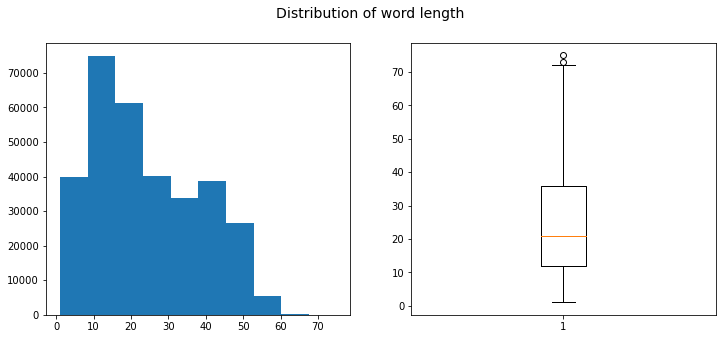

In [70]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(tweets['word_length'])
axes[1].boxplot(tweets['word_length'])
fig.suptitle('Distribution of word length', fontsize=14)
plt.show()

In [ ]:
# a tweet has on average 20 words 

## Average word length

In [72]:
def avg_word_length(text):
    # split the sring into words
    text = text.split()
    # calculate the length of each word 
    length_of_words = [len(word) for word in text]
    # calculate the average length of a text 
    return np.average(length_of_words)

In [73]:
tweets['avg_word_length'] = tweets.text.apply(avg_word_length)

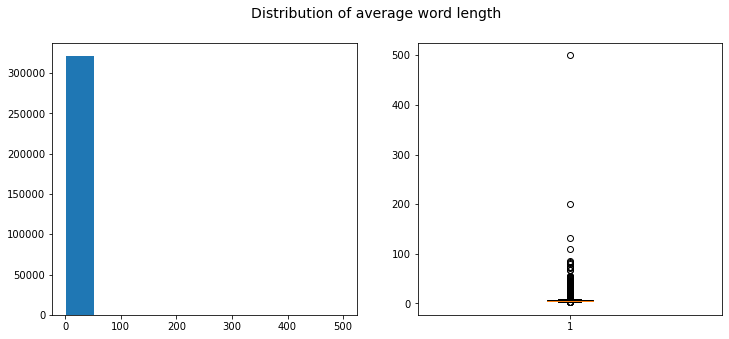

In [74]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(tweets['avg_word_length'])
axes[1].boxplot(tweets['avg_word_length'])
fig.suptitle('Distribution of average word length', fontsize=14)
plt.show()

In [75]:
tweets[tweets['avg_word_length'] > 100].text

19369     $AAPL Interactive Chart: https://finance.yahoo...
33349     $AAPL Interactive Chart: https://uk.finance.ya...
186883    $MSFT https://www.cnbc.com/2020/02/17/apple-wa...
315781    I do not understand #Tesla still after looking...
Name: text, dtype: object

In [76]:
# word are defined by a simple rule which search for spaces between consecutive strings, so url is one word 
tweets.loc[19369,'text']

'$AAPL Interactive Chart: https://finance.yahoo.com/chart/AAPL#eyJpbnRlcnZhbCI6IndlZWsiLCJwZXJpb2RpY2l0eSI6MSwidGltZVVuaXQiOm51bGwsImNhbmRsZVdpZHRoIjo3LjQ1NzE0Mjg1NzE0Mjg1Nywidm9sdW1lVW5kZXJsYXkiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiQUFQTCIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwidG9wIjowfX0sInNldFNwYW4iOnsibXVsdGlwbGllciI6MiwiYmFzZSI6InllYXIiLCJwZXJpb2RpY2l0eSI6eyJwZXJpb2QiOjEsImludGVydmFsIjoid2VlayJ9LCJtYWludGFpblBlcmlvZGljaXR5Ijp0cnVlLCJmb3JjZUxvYWQiOnRydWV9LCJsaW5lV2lkdGgiOjIsInN0cmlwZWRCYWNrZ3JvdWQiOnRydWUsImV2ZW50cyI6dHJ1ZSwiY29sb3IiOiIjMDA4MWYyIiwic3ltYm9scyI6W3sic3ltYm9sIjoiQUFQTCIsInN5bWJvbE9iamVjdCI6eyJzeW1ib2wiOiJBQVBMIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6IndlZWsiLCJ0aW1lVW5pdCI6bnVsbCwic2V0U3BhbiI6eyJtdWx0aXBsaWVyIjoyLCJiYXNlIjoieWVhciIsInBlcmlvZGljaXR5Ijp7InBlcmlvZCI6MSwiaW50ZXJ2YWwiOiJ3ZWVrIn0sIm1ha

## Number of hashtags and mentions

In [80]:
def nbr_of_hashtags(text):
    # split the sring into words
    text = text.split()
    # calculate the length of each word 
    list_of_hashtags = [word for word in text if word.startswith('#')]
    # calculate the average length of a text 
    return len(list_of_hashtags)

In [81]:
tweets['nbr_of_hashtags'] = tweets.hashtags.apply(nbr_of_hashtags)

c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


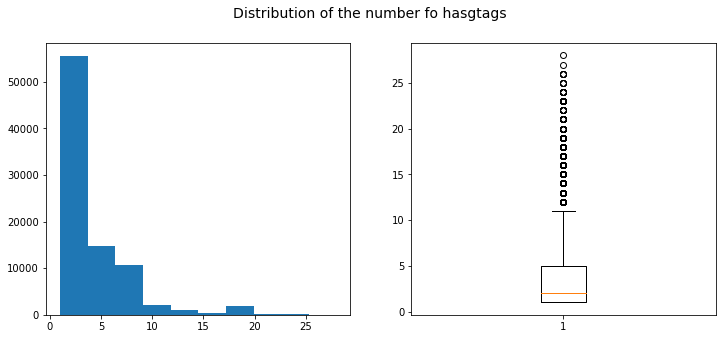

In [87]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(tweets['nbr_of_hashtags'])
axes[1].boxplot(tweets['nbr_of_hashtags'][~tweets['nbr_of_hashtags'].isna()])
fig.suptitle('Distribution of the number fo hasgtags', fontsize=14)
plt.show()

In [88]:
def nbr_of_mentions(text):
    # split the sring into words
    text = text.split()
    # calculate the length of each word 
    list_of_mentions = [word for word in text if word.startswith('@')]
    # calculate the average length of a text 
    return len(list_of_mentions)

In [93]:
tweets['nbr_of_mentions'] = tweets.mentions.apply(nbr_of_mentions)

c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


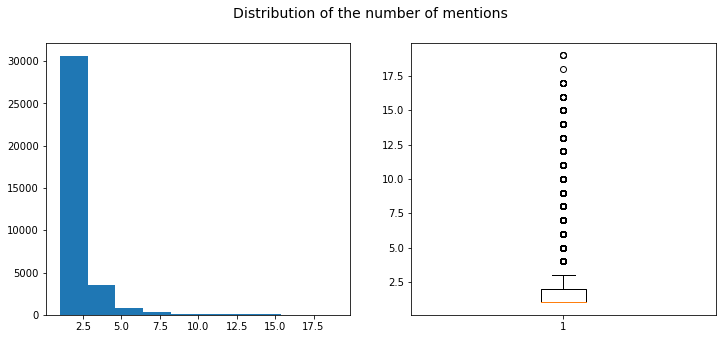

In [94]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(tweets['nbr_of_mentions'])
axes[1].boxplot(tweets['nbr_of_mentions'][~tweets['nbr_of_mentions'].isna()])
fig.suptitle('Distribution of the number of mentions', fontsize=14)
plt.show()

## Readibility test

In [101]:
# https://pypi.org/project/textstat/
import textstat

In [107]:
textstat.flesch_reading_ease('My name is Jaromir')

118.18

In [102]:
tweets.loc[0,'text']

'2019 Jan 2nd (22:30gmt) $JPY flash crash backdrop: - risk aversion sentiment on political risks - material shift in $AUD short to long positioning in prior quarter (build of stops) - $AAPL downgrade amid fears of China slowdown - China #Caixin PMI miss at 48.3 approx 3 year low'

In [109]:
print("Flesch reading ease :", textstat.flesch_reading_ease(tweets.loc[0,'text']))
print("SMOG index :", textstat.smog_index(tweets.loc[0,'text']))
print("Dale Chall readibility score :", textstat.dale_chall_readability_score(tweets.loc[0,'text']))
print("Gunning Fog :", textstat.gunning_fog(tweets.loc[0,'text']))

Flesch reading ease : 25.8
SMOG index : 0.0
Dale Chall readibility score : 9.73
Gunning Fog : 21.56
